In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

warnings.filterwarnings('ignore')

In [4]:
df1 = pd.read_csv('car_evaluation.csv')
df1.head(3)

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc


In [3]:
df = pd.read_csv('car_evaluation.csv', header = None)
df.head(3)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc


In [5]:
# EDA

In [6]:
# Manager gives name of all Columns after meeting with manager.

In [7]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

df.columns = col_names
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [8]:
df.head(3)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc


In [9]:
for col in df:
    print(df[col].value_counts())

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [10]:
df['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [11]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [12]:
# Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df:
    df[i] = le.fit_transform(df[i])

In [13]:
df.head(3)

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2


In [16]:
# Seperate 
X = df.drop(['class'], axis = 1)
y = df['class']

In [17]:
# Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33, random_state = 42)

In [18]:
# Check the shape of X_train and X_test
X_train.shape, X_test.shape

((1157, 6), (571, 6))

In [26]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.97      0.94      0.95       129
           1       0.74      1.00      0.85        20
           2       1.00      0.99      1.00       397
           3       0.96      0.92      0.94        25

    accuracy                           0.98       571
   macro avg       0.92      0.96      0.94       571
weighted avg       0.98      0.98      0.98       571

[[121   7   0   1]
 [  0  20   0   0]
 [  2   0 395   0]
 [  2   0   0  23]]


In [27]:
rfc_100 = RandomForestClassifier(n_estimators = 100, random_state = 0)

rfc_100.fit(X_train, y_train)

y_pred_100 = rfc_100.predict(X_test)

print(classification_report(y_test, y_pred_100))

print('Model accuracy score with 100 decision-trees : {0:0f}'.format(accuracy_score(y_test, y_pred_100)))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       129
           1       0.72      0.90      0.80        20
           2       0.98      0.99      0.98       397
           3       0.92      0.88      0.90        25

    accuracy                           0.95       571
   macro avg       0.89      0.91      0.90       571
weighted avg       0.96      0.95      0.95       571

Model accuracy score with 100 decision-trees : 0.954466


In [28]:
# RF has a property, tell us which column is the best for accuracy. 

In [29]:
# Find importand features with RF model

# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators = 100, random_state = 0)

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [30]:
# view the features score
feature_scores = pd.Series(rfc_100.feature_importances_, index = X_train.columns).sort_values(ascending = False)

feature_scores

safety      0.265392
persons     0.222230
buying      0.201751
maint       0.154568
lug_boot    0.089286
doors       0.066773
dtype: float64

In [31]:
# view the features score
feature_scores = pd.Series(clf.feature_importances_, index = X_train.columns).sort_values(ascending = False)

feature_scores

safety      0.265392
persons     0.222230
buying      0.201751
maint       0.154568
lug_boot    0.089286
doors       0.066773
dtype: float64

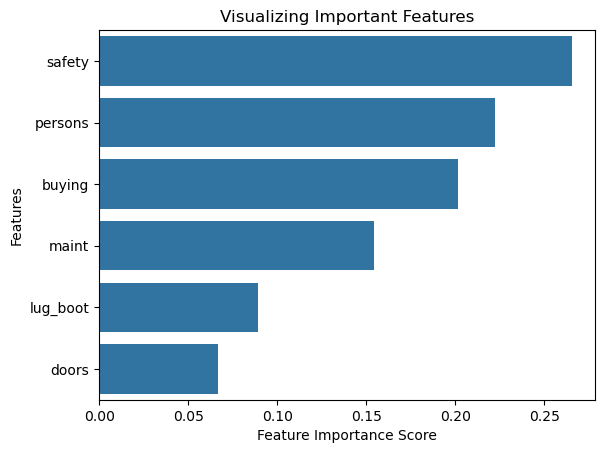

In [33]:
# bar chart

sns.barplot(x = feature_scores, y = feature_scores.index)

# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

plt.title('Visualizing Important Features')
plt.show()

In [34]:
# declare featuure vector and target variable

X = df.drop(['class', 'doors'], axis = 1)
y = df['class']

In [35]:
# split data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [36]:
# instantiate the classiifier with n_estimators = 100

clf = RandomForestClassifier(random_state = 0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88        83
           1       0.39      0.82      0.53        11
           2       0.99      1.00      0.99       235
           3       0.75      0.71      0.73        17

    accuracy                           0.93       346
   macro avg       0.77      0.83      0.78       346
weighted avg       0.95      0.93      0.94       346

[[ 67  11   3   2]
 [  0   9   0   2]
 [  1   0 234   0]
 [  2   3   0  12]]


In [ ]:
# Completed --------------------- RF.